In [5]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [9]:
# Veri ön işleme: Kategorik değişkenleri ve özellikleri hazırlama
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Gender column encoding

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [10]:
# Özellikler ve hedef değişken
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Gender']

In [11]:
# Veriyi eğitim ve test setlerine ayırma
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_df

,Age,Annual Income (k$),Spending Score (1-100)
124,23,70,29
16,35,21,35
148,34,78,22
93,40,60,40
65,18,48,59
...,...,...,...
106,66,63,50
14,37,20,13
92,48,60,49
179,35,93,90


In [12]:
# Veriyi standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train.shape, X_test.shape

((180, 3), (20, 3))

In [13]:
# 1. Lojistik Regresyon Modeli
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org


In [14]:
X_test_df

,Age,Annual Income (k$),Spending Score (1-100)
95,24,60,52
15,22,20,79
30,60,30,4
158,34,78,1
128,59,71,11
115,19,65,50
69,32,48,47
170,40,87,13
174,52,88,13
45,24,39,65


In [15]:
y_test.to_list()

[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]

In [16]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [17]:
# 2. Karar Ağacı Modeli
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

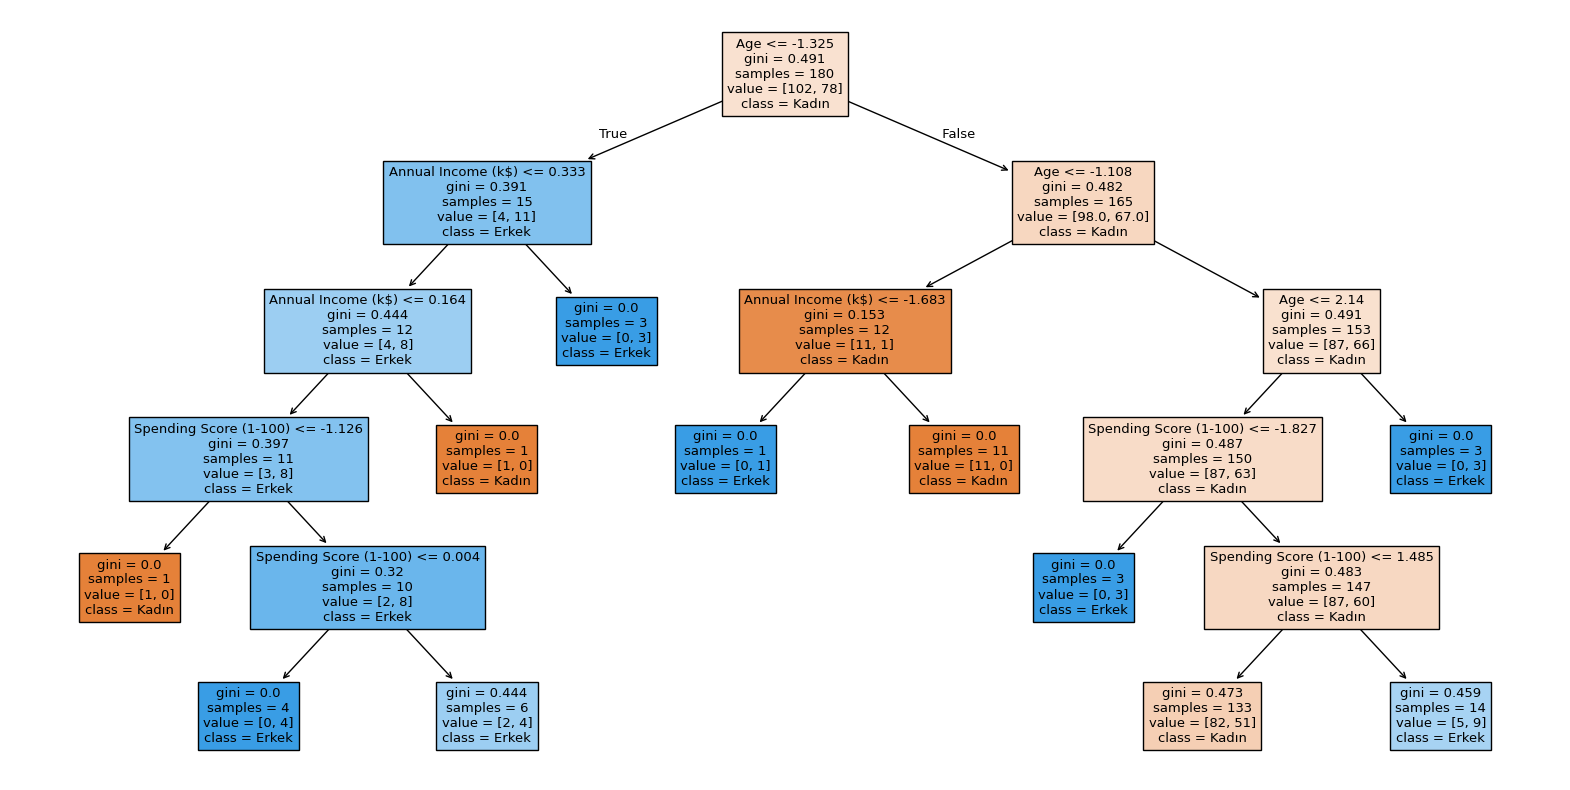

In [18]:
# Draw the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['Kadın', 'Erkek'])
plt.show()

In [19]:
y_pred_tree = tree_clf.predict(X_test)
y_pred_tree

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [20]:
y_test.to_list()

[1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]

In [21]:
# Performans değerlendirme
log_reg_report = classification_report(y_test, y_pred_log_reg)
tree_report = classification_report(y_test, y_pred_tree)

log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

(log_reg_report, log_reg_accuracy, tree_report, tree_accuracy)

('              precision    recall  f1-score   support\n\n           0       0.50      0.80      0.62        10\n           1       0.50      0.20      0.29        10\n\n    accuracy                           0.50        20\n   macro avg       0.50      0.50      0.45        20\nweighted avg       0.50      0.50      0.45        20\n',
 0.5,
 '              precision    recall  f1-score   support\n\n           0       0.59      1.00      0.74        10\n           1       1.00      0.30      0.46        10\n\n    accuracy                           0.65        20\n   macro avg       0.79      0.65      0.60        20\nweighted avg       0.79      0.65      0.60        20\n',
 0.65)

In [22]:
# show the results
print('Logistic Regression Model:')
print(log_reg_report)
print('Accuracy:', log_reg_accuracy)
print('Decision Tree Model:')
print(tree_report)
print('Accuracy:', tree_accuracy)

Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.50      0.20      0.29        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20

Accuracy: 0.5
Decision Tree Model:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.30      0.46        10

    accuracy                           0.65        20
   macro avg       0.79      0.65      0.60        20
weighted avg       0.79      0.65      0.60        20

Accuracy: 0.65


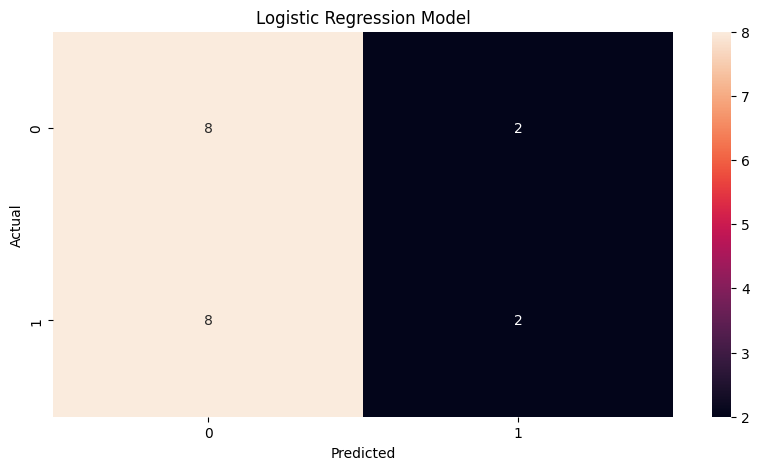

In [23]:
# draw the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_log_reg, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Logistic Regression Model')
plt.show()

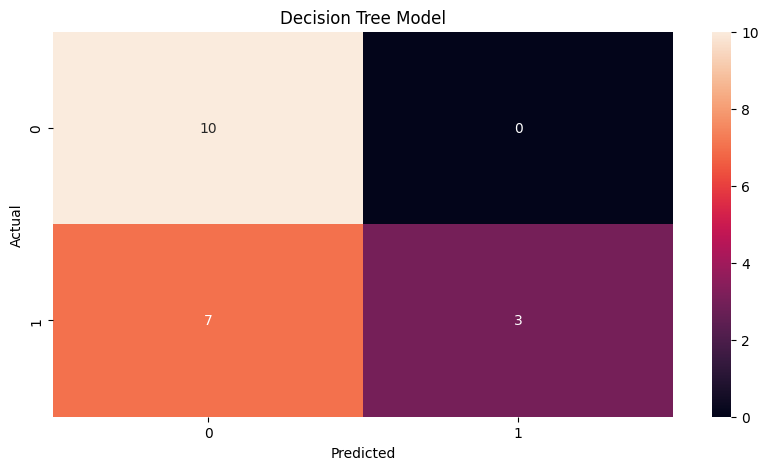

In [24]:
# draw the results
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d')
plt.title('Decision Tree Model')
plt.show()